**Link:** [dsm.business/videos/quicktour](dsm.business/videos/quicktour)

&#9888; Begin by creating a personal copy of this notebook. Then run the code cell below to load and install the necessary packages, which might take a few minutes to run.

# Introduction to Google Colab

---

This is a Google Colaboratory notebook, Colab for short. It is a product from Google Research. 

**Jupyter** is a free, open-source application that is one of many different ways to write, run, and present R code. Jupyter notebooks are a particularly good option in business settings because one can annotate code with nicely formatted images and text. This functionality can be used to create presentation-ready reports that combine code and its outputs with a written discussion of the results. Jupyter can be installed and run locally on your computer.

**Google Colab** is a browser-based platform that allows one to create, share, edit, and run notebooks in the cloud. In the same way that Google Docs allows one to write and share Word documents through a browser, Google Colab allows one to write, run, and share code notebooks. Google Colab is the platform that will be used throughout the DSM course.

## Getting Started

There are two important steps to get started with this notebook:

1. *Sign in to your Google account.* If you are not already signed in, you will see a blue `Sign in` button in the top right of your browser window. Click this to log in to your Google account.

2. *Create a copy of this notebook.* Once you are signed in, create your own copy of this notebook to work out of. You can do this by clicking the  `File -> Save a copy in Drive`. This will launch a new browser tab with a notebook titled `Copy of Class 1 Tutorial: Google Colab and R, A Quick Tour`, which you will work out of.
  + After copying the notebook, navigate to [drive.google.com](https://drive.google.com/drive/my-drive). Your Drive should now contain a directory called `Colab Notebooks`, which contains the copy you made of this notebook. 

# &#x1F3A5; **Try It Out**: The General Social Survey

---

In the following, we will analyze a small sample of variables related to happiness from the general social survey (GSS). The GSS is a yearly cross-sectional survey of Americans, run from 1976. We combine data for 25 years to yield 51,020 observations, and of the over 5,000 variables, we select seven related to happiness:

+ `age` - age in years (18–89)
+ `degree` - highest education (`lt high school`, `high school`, `junior college`, `bachelor`, `graduate`)
+ `happy` - happiness (`very happy`, `pretty happy`, `not too happy`)
+ `health` - health (`excellent`, `good`, `fair`, `poor`)
+ `marital` - marital status (`married`, `never married`, `divorced`, `widowed`, `separated`)
+ `sex` - sex (`female`, `male`)


**Note:** For now we just want to get comfortable running R code in the Colab environment, so do not worry about understanding all of the code below. We will learn all of these commands throughout the course!


## Reading in the Data

The code cell below reads in our happiness data from a comma-separated value (csv) file and stores it into a data frame called `df`. We then do some processing to clean the data and display the first few rows. 

In [ ]:
# Load the tidyverse package (which is pre-installed in Colab)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# Read in the data from the happy.csv file to a data frame called df
df <- read_csv("http://www.dsm.business/data/happiness_data.csv")

# Remove all the missing data
df <- na.omit(df)
# Display the first few rows of the data
head(df)

Rows: 2023 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): sex, degree, happy, health, marital
dbl (1): age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,degree,happy,health,marital
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
49,male,lt high school,not too happy,poor,never married
48,male,bachelor,pretty happy,excellent,married
47,male,lt high school,pretty happy,poor,married
32,male,lt high school,not too happy,good,divorced
37,female,lt high school,pretty happy,good,widowed
72,male,junior collegel,very happy,poor,married


## Choose Color Palette

For our visualizations, it is important that we use colors that can still be detected by those with color blindness. For those interested, there is a discussion of using color-blind safe colors in R [here](https://stackoverflow.com/questions/57153428/r-plot-color-combinations-that-are-colorblind-accessible). Below we define the color blind safe colors using their hex names (see the movie The Martian), and store this color palettes in `colors`.

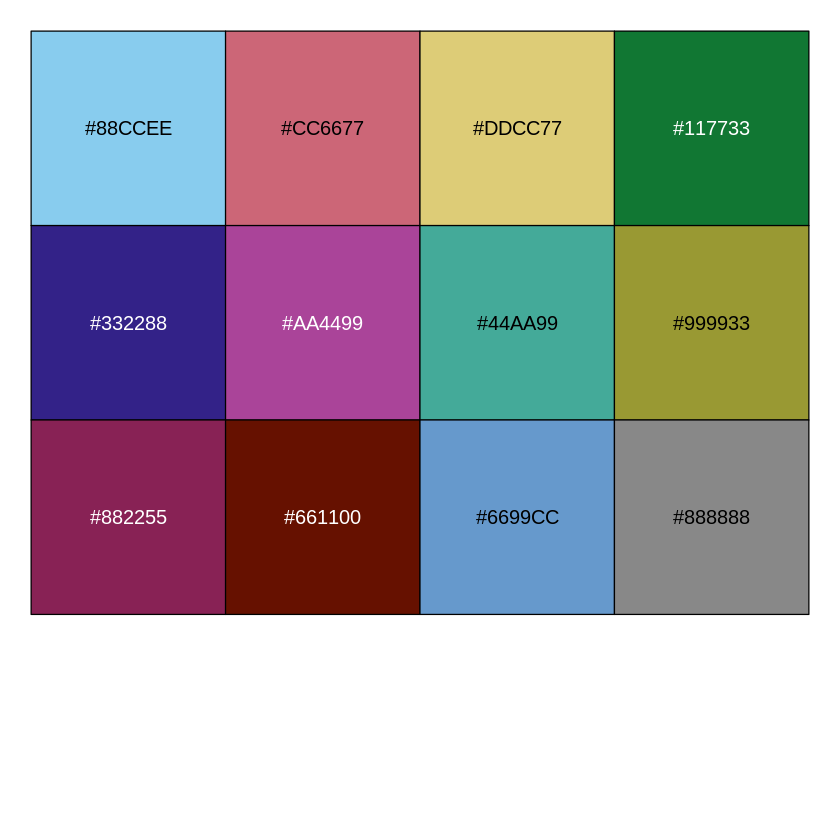

In [ ]:
colors <- c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888")
scales::show_col(colors)

## Visualizations

### **Distribution of `happy`**

Now that we've chosen our color palette, let's visualize the distribution of the `happy` variable. 

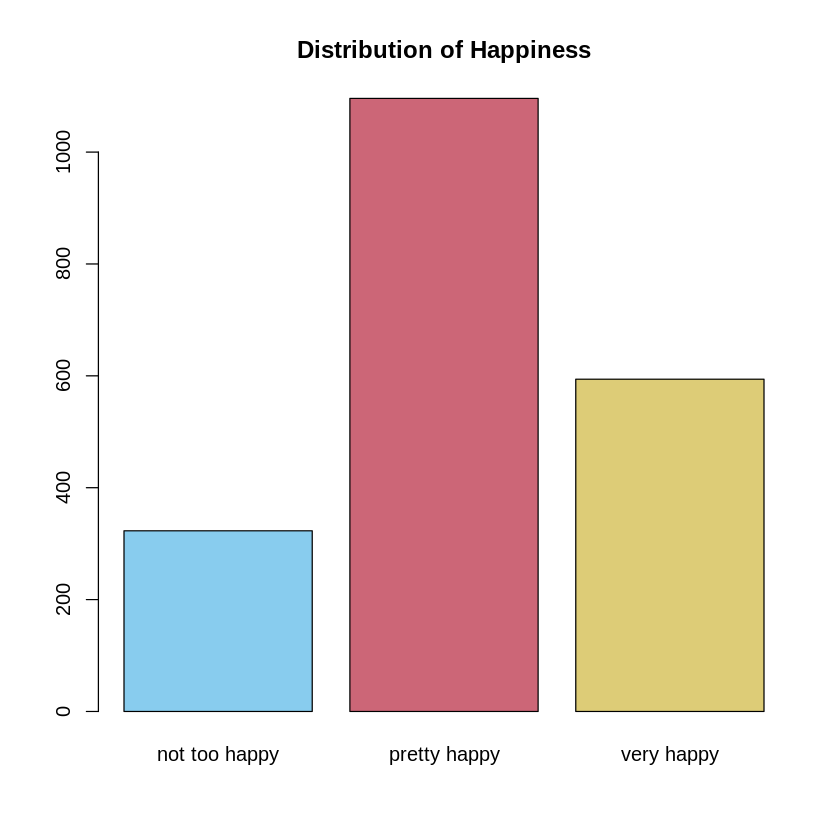

In [ ]:
barplot(table(df$happy), col = colors, main = "Distribution of Happiness")

### **Distribution of `sex`**

Next, let's look at the distribution of `sex`. 

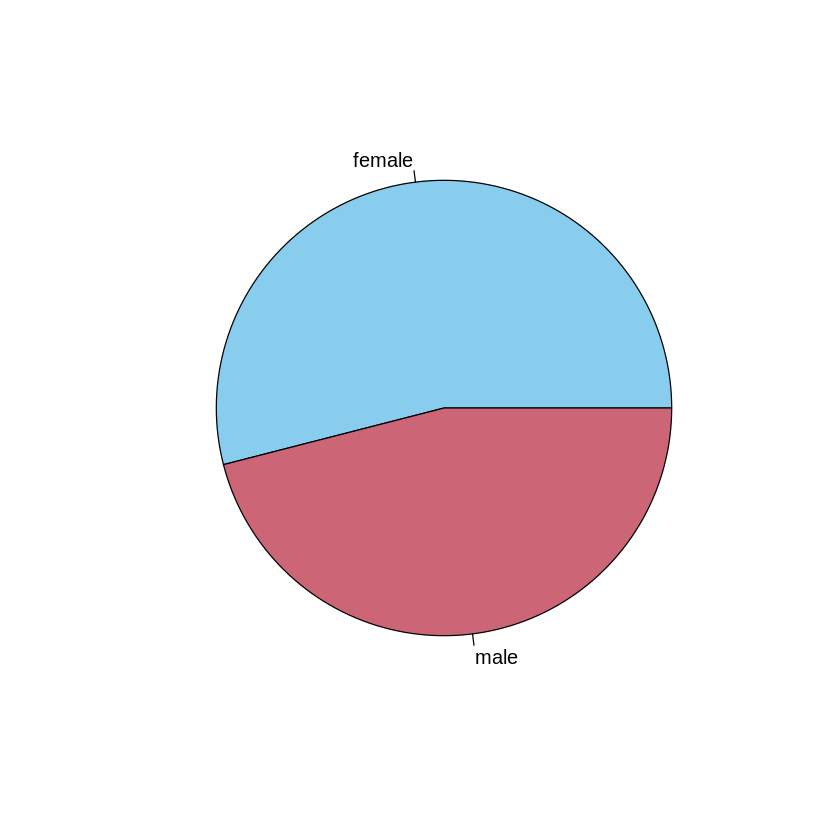

In [ ]:
pie(table(df$sex), col = colors)

### **Relationship between `happy` and `sex`**

Finally, let's create a visualization that explores the relationship between the `happy` and `sex` variables. 

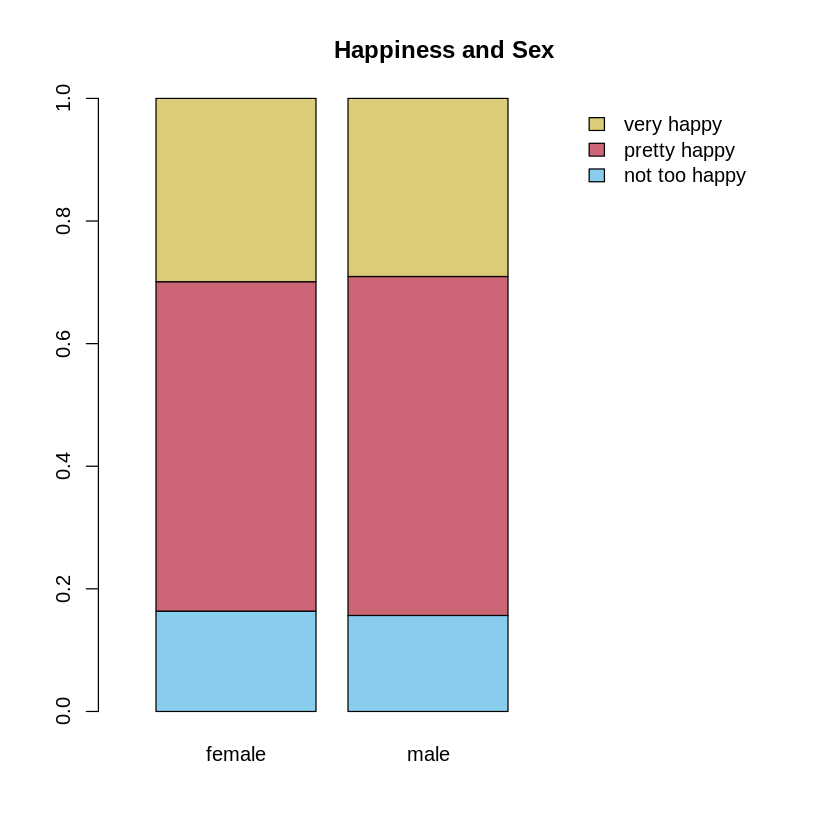

In [ ]:
barplot(prop.table(table(df$happy, df$sex), margin = 2), 
          col = colors,
          legend.text = TRUE, xlim = c(0, 4),
          args.legend = list(x = 4, y = 1, bty = "n"), 
          main = "Happiness and Sex")

### **Relationship between `happy` and `age`**

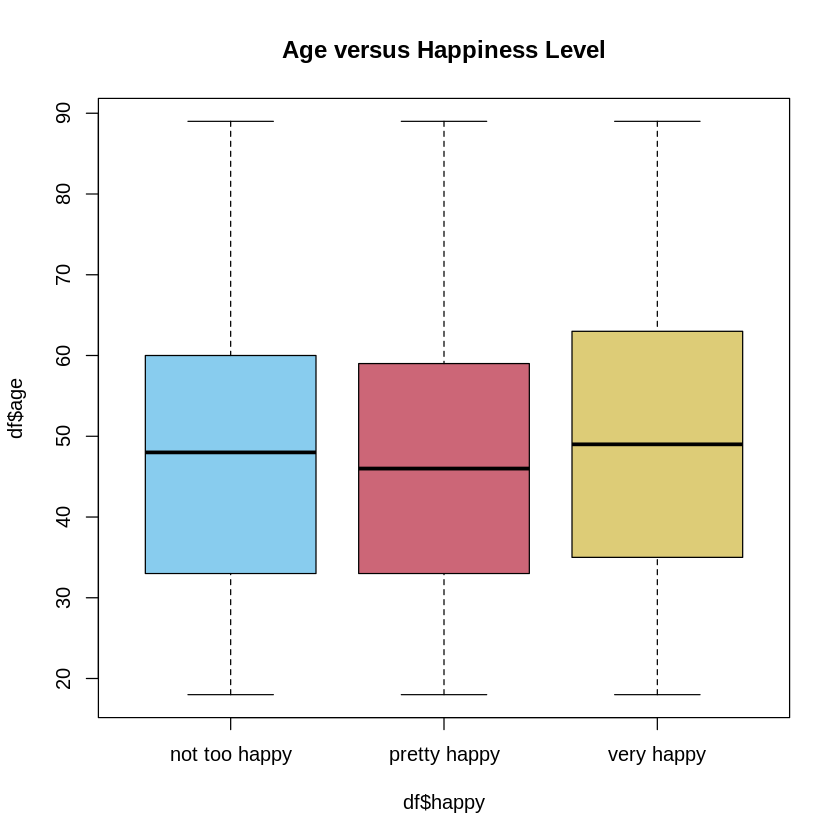

In [ ]:
boxplot(df$age ~ df$happy, col = colors, main = "Age versus Happiness Level")

## Summary Statistics

In [ ]:
df %>%
  group_by(happy) %>%
  summarise(n = n(), average_age = mean(age), median_age = median(age),
            sd_age = sd(age), min_age = min(age), max_age = max(age))

happy,n,average_age,median_age,sd_age,min_age,max_age
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
not too happy,323,47.73065,48,18.13661,18,89
pretty happy,1096,46.86131,46,17.12423,18,89
very happy,594,49.25926,49,17.25154,18,89
